# Detecting Fraudulent Transactions




> #### *Dataset from [Kaggle](https://www.kaggle.com/c/ieee-fraud-detection/data)*
*https://www.kaggle.com/c/ieee-fraud-detection/data*




## *Week 03 homework:*
---


### *Importing libraries*

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

### *Downloading and unzipping dataset*





1.   **Use username and token for Kaggle API**
>```
os.environ['KAGGLE_USERNAME'] = "USERNAME_GOES_HERE"
os.environ['KAGGLE_KEY'] = "TOKEN_GOES_HERE"
```
2.   **Download dataset**
3.   **Unzip dataset files**



*For some reason, requires refreshing 'files' in colab to display and use the unzipped files.*


In [0]:
# Download
os.environ['KAGGLE_USERNAME'] = "KAGGLE_USERNAME_HERE"
os.environ['KAGGLE_KEY'] = "KAGGLE_KEY_HERE"
!kaggle competitions download -c ieee-fraud-detection

# Unzip
!unzip train_transaction.csv.zip
!unzip train_identity.csv.zip

### *Data preprocessing*




1.   **Read training data and set as dataframe**
2.   **Merge training dataframes** *by Transaction ID (`on='TransactionID'`) but ignore data we already have in the transaction data file (frame) (`'how=left'`)*
3.   **Check how many null values are in the data and drop / remove 50% of them.** *(The whole column)* 
4.   **Replace any** ```'NOT A NUMBER (NaN)'``` **values with -999**
5.   **Define ```'y'``` as the fraud or not fraud column, and ```'X'``` as all of the feature columns**
6.   **Replace categorical data with numerical data using `LabelEncoder` while looping through each column**
7.   **Split the data into training and testing data with 30% of it being for testing**



In [0]:
# Read
df_train_transaction = pd.read_csv('train_transaction.csv')
df_train_identity = pd.read_csv('train_identity.csv')

# Merge
df_train = pd.merge(df_train_transaction, df_train_identity, on='TransactionID', how='left')

# Drop some null values and replace NaN data with -999
null_percent = df_train.isnull().sum()/df_train.shape[0]*100
cols_to_drop = np.array(null_percent[null_percent > 50].index)
df_train = df_train.drop(cols_to_drop, axis=1)
df_train = df_train.fillna(-999)

# Set training X and y data for ML later
train_y = df_train['isFraud']
train_X = df_train.drop('isFraud', axis=1)

# Loop through all columns / features. If it's categorical, replace it.
for f in train_X.columns:
  if train_X[f].dtype=='object': 
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_X[f].values))
    train_X[f] = lbl.transform(list(train_X[f].values))

# Split data into training and testing and specifiy the percentage of desired testing data    
X_train,X_test,y_train,y_test=train_test_split(train_X,train_y,test_size=0.3)

### *Stats and visualizing*

1.   **Output stats about the unmerged data**
2.   **Output stats about the merged data**
3.   **Plot not fraud vs fraud**


Train transaction & identity (rows - columns):  (590540, 394) (144233, 41)

Transaction & identity merged dataframes
Train merged: (rows - columns):  (590540, 220)


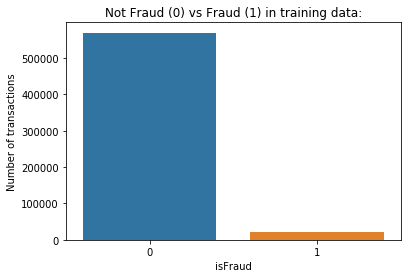

In [5]:
# Output dataframe stats
print('Train transaction & identity (rows - columns): ', df_train_transaction.shape, df_train_identity.shape)
print() # For a line break
print('Transaction & identity merged dataframes')
print('Train merged: (rows - columns): ', df_train.shape)

# Graph / Plot - not fraud vs fraud
ax = sns.countplot(x='isFraud', data=df_train_transaction)
ax.set_title('Not Fraud (0) vs Fraud (1) in training data:')
ax.set_ylabel('Number of transactions')
plt.show()

### *Predicting with Logistic Regression and output scores*

1.   **Set the algorythm to use**
2.   **Fit the data**
3.   **Predict**
4.   **Output the score**
5.   **Output the recall score**
6.   **Output the accuracy score**

In [6]:
# Use logistic regression, fit the data, predict and score the model
lr = LogisticRegression(solver='lbfgs')  
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

# Model scores
print("Score: ")
print(lr.score(X_test, y_test))
print()
print("Recall score: ")
print(recall_score(y_test, y_pred))
print()
print("Accuracy score: ")
print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Score: 
0.9644393267179192

Recall score: 
0.0022392834293026233

Accuracy score: 
0.9644393267179192
